# Gerando as imagens para o dataset

Classes: (livro geometa)
        "triangle",
        "square",
        "rectangle",
        "trapeze",
        "rhombus",
        "parallelogram",
        "pentagon",
        "hexagon",

In [20]:
from PIL import Image, ImageDraw
import random
import os
import numpy as np
import cv2 as cv

random.seed(13)

metadata = {
    "train": {
        "labels": [
            "triangle",
            "square",
            "rectangle",
            "trapeze",
            "rhombus",
            "parallelogram",
            "pentagon",
            "hexagon",
            "circle"
        ],
        "size": 700,  # for each label
    },
    "val": {
        "labels": [
            "triangle",
            "square",
            "rectangle",
            "trapeze",
            "rhombus",
            "parallelogram",
            "pentagon",
            "hexagon",
            "circle"
        ],
        "size": 200,  # for each label
    },
    "test": {
        "labels": [
            "triangle",
            "square",
            "rectangle",
            "trapeze",
            "rhombus",
            "parallelogram",
            "pentagon",
            "hexagon",
            "circle"
        ],
        "size": 100,  # for each label
    },
}

os.makedirs("data", exist_ok=True)
for step in list(metadata.keys()):
    os.makedirs(f"data/{step}", exist_ok=True)
    for label in metadata[step]["labels"]:
        os.makedirs(f"data/{step}/{label}", exist_ok=True)
        for i in range(metadata[step]["size"]):
            img = Image.new("RGB", (50, 50), (0, 0, 0))
            draw = ImageDraw.Draw(img)
            dmin, dmax = 5, 45
            line_width = 2
            # 3 pontos aleatórios
            if label == "triangle":
                x = random.sample(range(dmin, dmax), 3)
                y = random.sample(range(dmin, dmax), 3)

                draw.polygon(
                    (
                        (x[0], y[0]),
                        (x[1], y[1]),
                        (x[2], y[2]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "square":
                coord = random.sample(range(dmin, dmax), 2)

                draw.polygon(
                    (
                        (coord[0], coord[0]),
                        (coord[0], coord[1]),
                        (coord[1], coord[1]),
                        (coord[1], coord[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "rectangle":
                x = sorted(random.sample(range(dmin, dmax), 2))
                y = sorted(random.sample(range(dmin, dmax), 2))

                draw.polygon(
                    (
                        (x[0], y[0]),
                        (x[0], y[1]),
                        (x[1], y[1]),
                        (x[1], y[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "trapeze":
                x = sorted(random.sample(range(dmin, dmax), 4))
                y = sorted(random.sample(range(dmin, dmax), 2))

                draw.polygon(
                    ((x[0], y[0]), (x[1], y[1]), (x[2], y[1]), (x[3], y[0])),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "rhombus":
                x = random.sample(
                    range(int((dmin + dmax) / 2 - dmin), int((dmin + dmax) / 2 + dmin)), 1
                )
                y = random.sample(
                    range(int((dmin + dmax) / 2 - dmin), int((dmin + dmax) / 2 + dmin)), 1
                )
                varx, vary = random.sample(range(dmin, int((dmin + dmax) / 2 - dmin)), 2)

                draw.polygon(
                    (
                        (x[0] - varx, y[0]),
                        (x[0], y[0] + vary),
                        (x[0] + varx, y[0]),
                        (x[0], y[0] - vary),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "parallelogram":
                x = random.sample(
                    range(
                        int((dmin + dmax) / 2 - 2 * dmin), int((dmin + dmax) / 2 + 2 * dmin)
                    ),
                    2,
                )
                y = sorted(random.sample(range(dmin, dmax), 2))
                varx = random.sample(
                    range(dmin * (-1), int((dmin + dmax) / 2 - 2 * dmin)), 1
                )

                draw.polygon(
                    (
                        (x[0], y[0]),
                        (x[1], y[0]),
                        (x[1] + varx[0], y[1]),
                        (x[0] + varx[0], y[1]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "pentagon":
                x = sorted(random.sample(range(dmin, dmax), 5))
                y = sorted(random.sample(range(dmin, dmax), 5))

                draw.polygon(
                    (
                        (x[0], y[2]),
                        (x[2], y[4]),
                        (x[4], y[3]),
                        (x[3], y[1]),
                        (x[1], y[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "hexagon":
                x = sorted(random.sample(range(dmin, dmax), 6))
                y = sorted(random.sample(range(dmin, dmax), 3))

                draw.polygon(
                    (
                        (x[0], y[1]),
                        (x[1], y[2]),
                        (x[3], y[2]),
                        (x[5], y[1]),
                        (x[4], y[0]),
                        (x[2], y[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            elif label == "circle":
                x = random.randint(
                    int((dmin + dmax) / 2 - 2 * dmin), int((dmin + dmax) / 2 + 2 * dmin)
                )
                y = random.randint(
                    int((dmin + dmax) / 2 - 2 * dmin), int((dmin + dmax) / 2 + 2 * dmin)
                )
                radius = random.randint(
                    dmin, int((dmin + dmax) / 2 - 2 * dmin)
                )

                draw.ellipse(
                    (x - radius, y - radius, x + radius, y + radius),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                    width=line_width
                )

            img = img.rotate(random.randint(1, 360))

            # aplicando ruído
            # Converter a imagem em um array NumPy
            img = np.array(img)

            # Definir a intensidade do ruído (um valor pequeno é geralmente suficiente)
            ruido = 80

            # Gerar ruído aleatório com a mesma forma que a imagem
            ruido = np.random.normal(0, ruido, img.shape)

            # Adicionar o ruído à imagem
            img = img + ruido

            # Converter de volta para uma imagem do tipo uint8
            img = np.uint8(np.clip(img, 0, 255))
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

            # Criar uma nova imagem com o ruído
            img = Image.fromarray(img)
            img.save(f"data/{step}/{label}/imagem_{i}.jpg")

# Pré-processamento da imagem

In [21]:
import cv2 as cv
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

path = 'test2.jpg'

# Carregue a imagem RGB
img = cv.imread(path)

width, height, i = img.shape

# Aplica o redimensionamento
img_pos = cv.resize(img, (50, 50))

# Converte a imagem RGB em escala de cinza
img_pos = cv.cvtColor(img_pos, cv.COLOR_BGR2GRAY)

# Normaliza a imagem para o intervalo [0, 255]
img_pos = cv.normalize(img_pos, None, 0, 255, cv.NORM_MINMAX)

# Aplicar suavização para reduzir o ruído
img_pos = cv.medianBlur(img_pos, 3)

# Ajustar o contraste e brilho
img_pos = cv.convertScaleAbs(img_pos, alpha=1., beta=-100)

# Aplique uma operação de equalização de histograma para melhorar o contraste
img_pos = cv.equalizeHist(img_pos)

# Matriz de convolução
kernel = np.ones((3, 3), np.uint8)

img_pos = cv.dilate(img_pos, kernel, iterations=2)

# Aplicar detecção de bordas usando o operador Canny
img_pos = cv.Canny(img_pos,50,50)

img_pos = cv.dilate(img_pos, kernel, iterations=1)
img_pos = cv.erode(img_pos, kernel, iterations=2)

# Aplica o redimensionamento
img = cv.resize(img, (400, 400))
img_pos = cv.resize(img_pos, (400, 400))

img_base = cv.imread(r'data\test\rectangle\imagem_40.jpg')
img_base = cv.resize(img_base, (400, 400))

# Salve ou mostre a imagem em escala de cinza
cv.imshow('Imagem original', img)
cv.imshow('Imagem Processada', img_pos)
cv.imshow('Imagem da Base', img_base)
cv.waitKey(0)
cv.destroyAllWindows()

# Criando o modelo

Carregando os dados de treino e validação

In [61]:
import os
import cv2 as cv
import numpy as np
from PIL import Image

def load_data(**kwargs):
    X = []
    y = []

    dir = kwargs['datadir']
    labels = os.listdir(dir)
    for label in range(len(labels)):
        label_path = os.path.join(dir, labels[label])
        for image in os.listdir(label_path):
            im = cv.imread(os.path.join(label_path, image), cv.IMREAD_GRAYSCALE)
            #im = im.reshape(50, 50).astype(np.uint8)
            #im = np.array(im)
            X.append(im)
            y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)

    if kwargs['shuffle'] == True:
        np.random.seed(42)
        shuffle_index = np.random.permutation(X.shape[0])
        X, y = X[shuffle_index], y[shuffle_index]

    if kwargs['normalize'] == True:
        X = X.astype('float32') / 255.0

    return X, y.astype('int'), labels

In [62]:
X_train, y_train, labels = load_data(datadir = 'data/train/', shuffle = True, normalize = True)
X_val, y_val, _ = load_data(datadir = 'data/val/', shuffle = True, normalize = True)
X_test, y_test, _ = load_data(datadir = 'data/test/', shuffle = True, normalize = True)

In [64]:
print(X_train[0])

[[0.12941177 0.20784314 0.         ... 0.04705882 0.02745098 0.02352941]
 [0.1882353  0.24313726 0.2901961  ... 0.         0.02352941 0.04705882]
 [0.         0.         0.         ... 0.04705882 0.25882354 0.16862746]
 ...
 [0.04313726 0.         0.27058825 ... 0.14901961 0.1882353  0.03921569]
 [0.00784314 0.1764706  0.14901961 ... 0.00392157 0.12941177 0.07450981]
 [0.20392157 0.12941177 0.06666667 ... 0.         0.11764706 0.05882353]]


In [65]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=(50, 50, 1)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(1024, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(2048, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dense(len(labels), activation='softmax') 
])

batch_size = 512
STEPS_PER_EPOCH = len(y_train) // batch_size
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*10,
  decay_rate=2,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

model.compile(optimizer = get_optimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 24, 24, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 256)       295168    
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 512)       1180160   
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 6, 6, 512)        

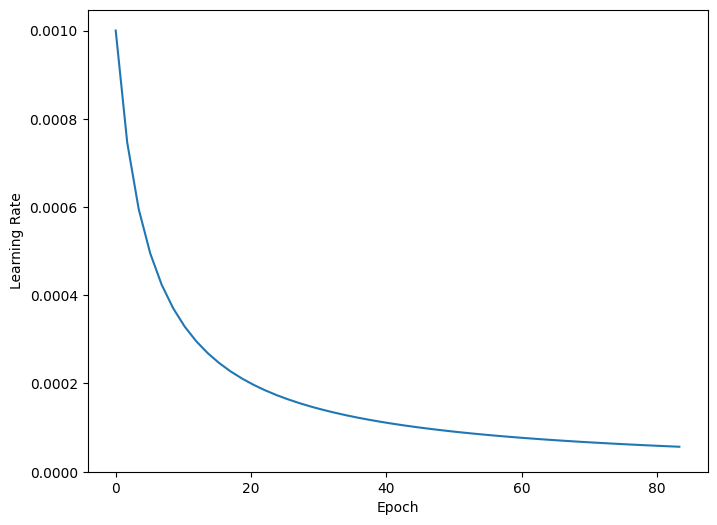

In [66]:
import matplotlib.pyplot as plt

step = np.linspace(0,1000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [67]:
epochs = 50
history = model.fit(
  X_train,
  y_train,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/50
 3/13 [=====>........................] - ETA: 5:26 - loss: 2.3484 - accuracy: 0.1354

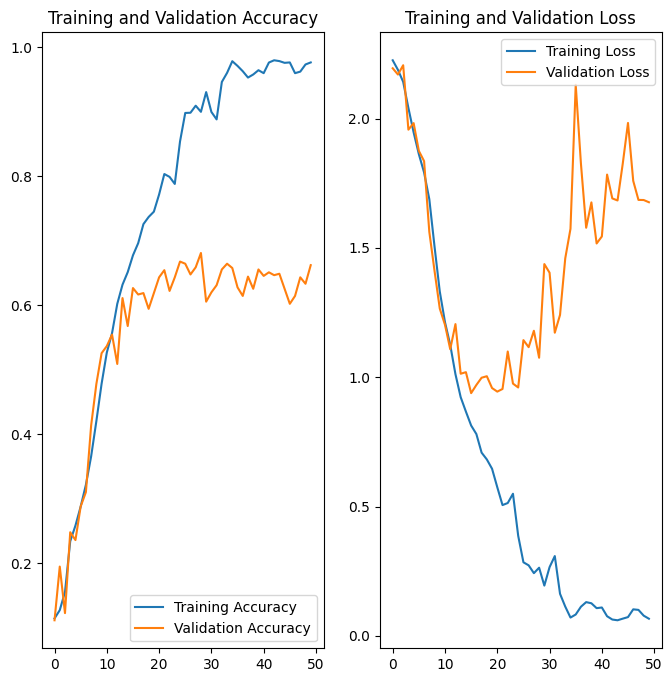

In [60]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
# Save the entire model as a SavedModel.
model.save('models/CNN_v1')

INFO:tensorflow:Assets written to: models/CNN_v0\assets


INFO:tensorflow:Assets written to: models/CNN_v0\assets


In [38]:
epochs = 1000
acc_hist = []

for i in range(epochs):
  model.fit(train_ds, epochs=1, batch_size=batch_size, verbose=0, shuffle=False) #base já embaralhada
  
  acc_val = []
  for images, labels in val_ds.map(lambda x, y: (x, y)):
    predictions = model.predict(images)
    y_pred = np.argmax(predictions, axis=1)
    acc_val.append(accuracy_score(labels, y_pred))
  
  mean_acc = np.mean(acc_val)
  acc_hist.append(mean_acc)

  print(f"Época {i}/{epochs}: Acurácia: {mean_acc}")
  if mean_acc == 1.0 :
    print(f"Métrica objetivo alcançada!\nFinalizando o treinamento na época {i}")
    break

  if i>20:
    if i-np.argmax(mean_acc) >= 20:
      print(f"Treinamento entrando em overfitting após verificação das últimas 20 épocas sem melhoria nas métricas!\nFinalizando o treinamento na época {i}")
      break

1/1 [==============================] - 0s 69ms/step
Época 0/1000: Acurácia: 0.14547413793103448
1/1 [==============================] - 0s 36ms/step
Época 1/1000: Acurácia: 0.2338362068965517


KeyboardInterrupt: 

In [ ]:

#Avaliando os resultados
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred_mod = np.argmax(model.predict(X_test_mod), axis=1)

print(f'Acurácia na base de teste sem ruído: {accuracy_score(y_test, y_pred)}')
print(f'Acurácia na base de teste com ruído: {accuracy_score(y_test, y_pred_mod)}')